# Unveiling Sentiments in Political Speeches: Analyzing the Prime Minister's Address" (PM replies to Motion of No Confidence in Lok Sabha, 10 Aug, 2023)

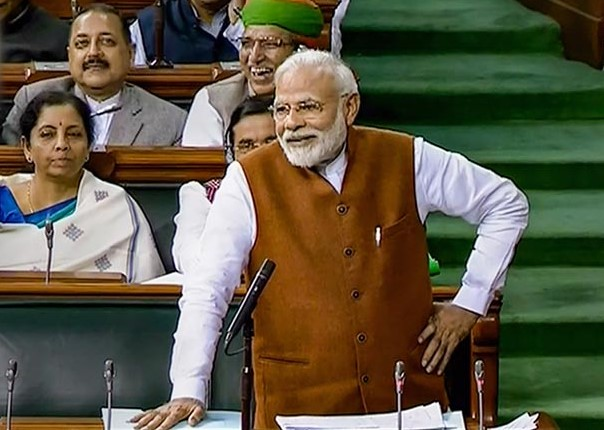

Importing The Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [17]:
import warnings
warnings.filterwarnings('ignore')

Loading data

In [18]:
file_path = "/content/pm speech.txt"

In [19]:
with open(file_path , 'r' , encoding = "utf-8") as file:
  speech_text = file.read()

NLP comes into the Picture

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Downloading the necessary batches

In [21]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Performing NLP operations

In [22]:
speech_text_cleaned = re.sub(r'[^\w\s]' , '' , speech_text)

#This step is often done to ensure that the text is in a consistent case (usually lowercase)
# for further processing or analysis.

speech_text_cleaned = speech_text_cleaned.lower()


#Tokenization is the process of splitting a text into individual words or tokens
words = word_tokenize(speech_text_cleaned)

# Stopwords are common words (e.g., "a," "an," "the," "in") that are often removed from text
#during natural language processing tasks because they typically don't carry significant meaning.

stop_words = set(stopwords.words('english'))

words_filtered = [word for word in words if word not in stop_words]

In [23]:
#For example, it can convert words like "running" to "run" or "better" to "good."

lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

Get the average sentiment

In [24]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [25]:
print("The average sentiment is :" , average_sentiment)

The average sentiment is : 0.014298377028714108


EXTRACT POSITIVE NEGATIVE AND NEUTRAL

In [43]:
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [44]:
print('The positive words are:', positive_words)

The positive words are: ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'ass

In [45]:
print('The negative words are:', negative_words)

The negative words are: ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [46]:
print('The neutral words are:', neutral_words)

The neutral words are: ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', '

Freqdist = It helps you count the occurrences of each unique item in the list and provides various methods for analyzing and visualizing these frequencies.

In [47]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

In [48]:
print('The positive words frequency is:', word_freq_positive)

The positive words frequency is: <FreqDist with 74 samples and 138 outcomes>


In [49]:
print('The negative words frequency is:', word_freq_negative)

The negative words frequency is: <FreqDist with 61 samples and 82 outcomes>


In [50]:
print('The neutral words frequency is:', word_freq_neutral)

The neutral words frequency is: <FreqDist with 658 samples and 1382 outcomes>


DATA VISUALIZATION

PLOTTING THESE OCCURRENCES for Visualization

subplot - means plot within plot

eg : plt.subplot(133) creates a subplot in a figure with a grid layout of 1 row and 3 columns, and it positions the subplot in the third (rightmost) column.(same for all)

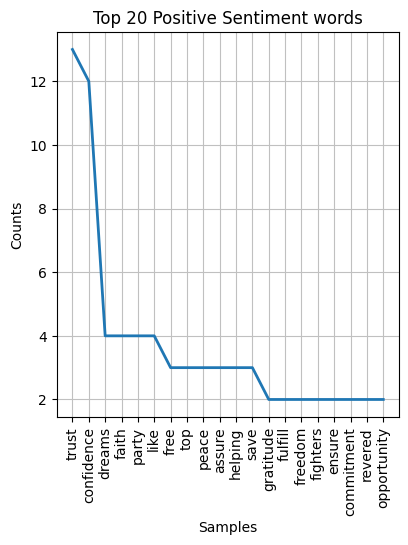

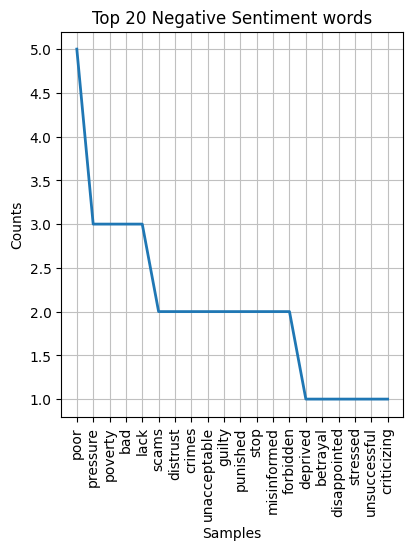

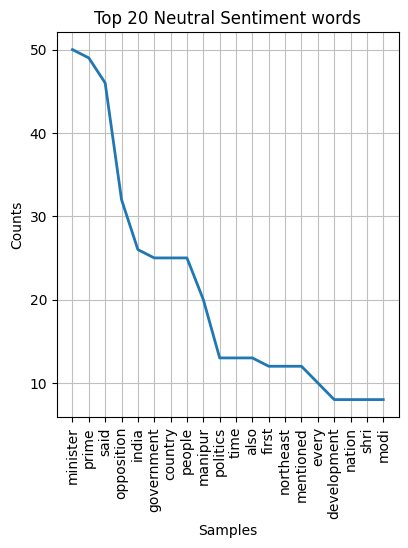

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(131)
word_freq_positive.plot(20,title="Top 20 Positive Sentiment words")

plt.figure(figsize=(15,5))
plt.subplot(132)
word_freq_negative.plot(20,title="Top 20 Negative Sentiment words")

plt.figure(figsize=(15,5))
plt.subplot(133)
word_freq_neutral.plot(20,title="Top 20 Neutral Sentiment words")


plt.tight_layout()
plt.show()

Generating NeW Data Frames

In [52]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])

Plotting BAR GRaphs

In [53]:
fig_positive = px.bar(df_positive, x='Word', y='Frequency', title="Top 20 Positive Sentiment Words")
fig_negative = px.bar(df_negative, x='Word', y='Frequency', title="Top 20 Negative Sentiment Words")
fig_neutral = px.bar(df_neutral, x='Word', y='Frequency', title="Top 20 Neutral Sentiment Words")

fig_positive.show()
fig_negative.show()
fig_neutral.show()

PLOTTING WORD CLOUDS

In [56]:
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_neutral)

Bilinear Interpolation:

 It takes the weighted average of the four nearest known pixels to estimate the value of the unknown pixel. This method creates smoother transitions and is commonly used in image resizing.

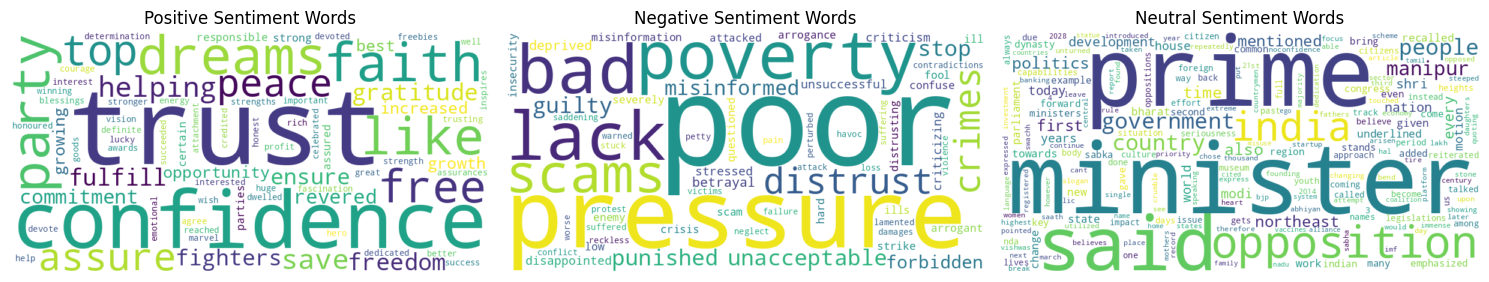

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

Seperately

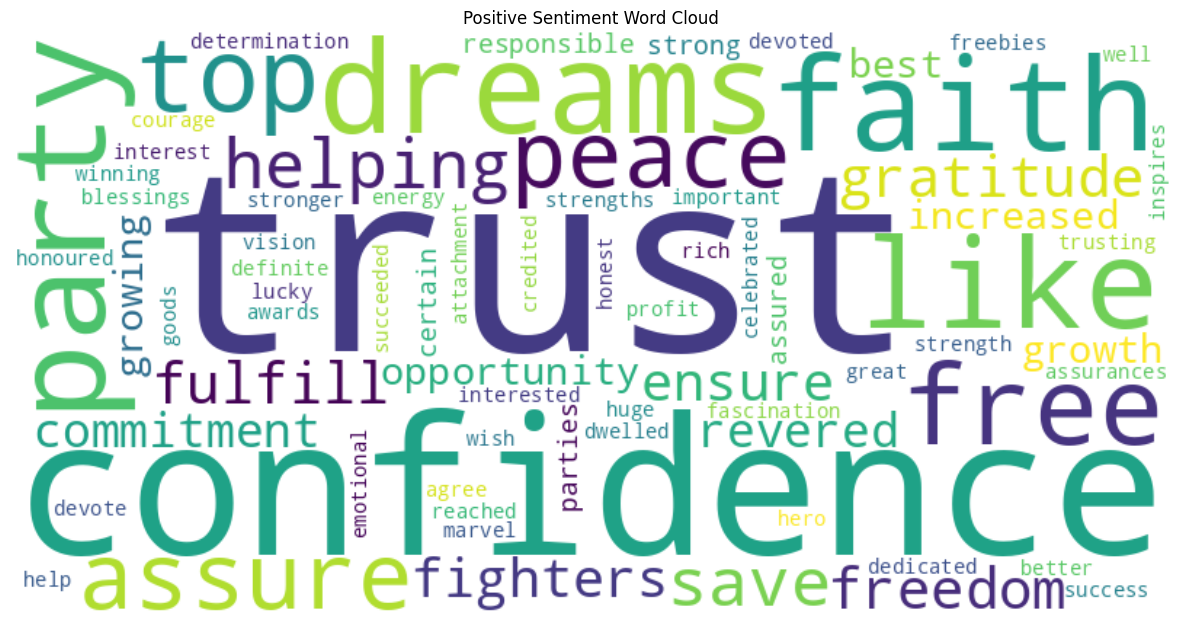

In [58]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")
plt.show()

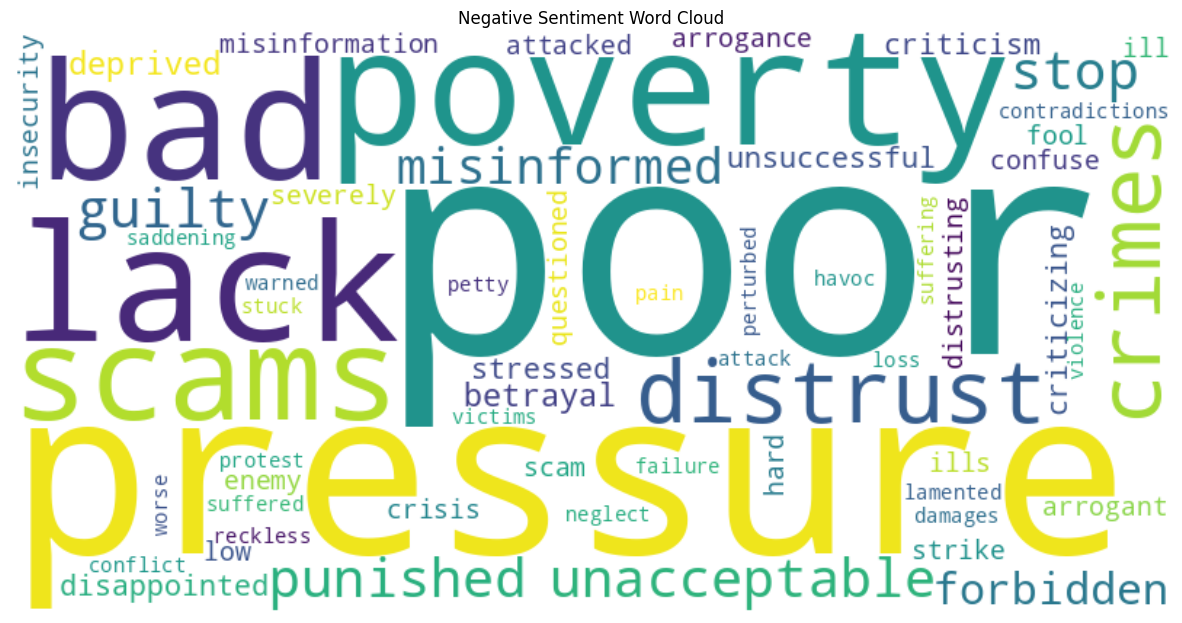

In [60]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")
plt.show()

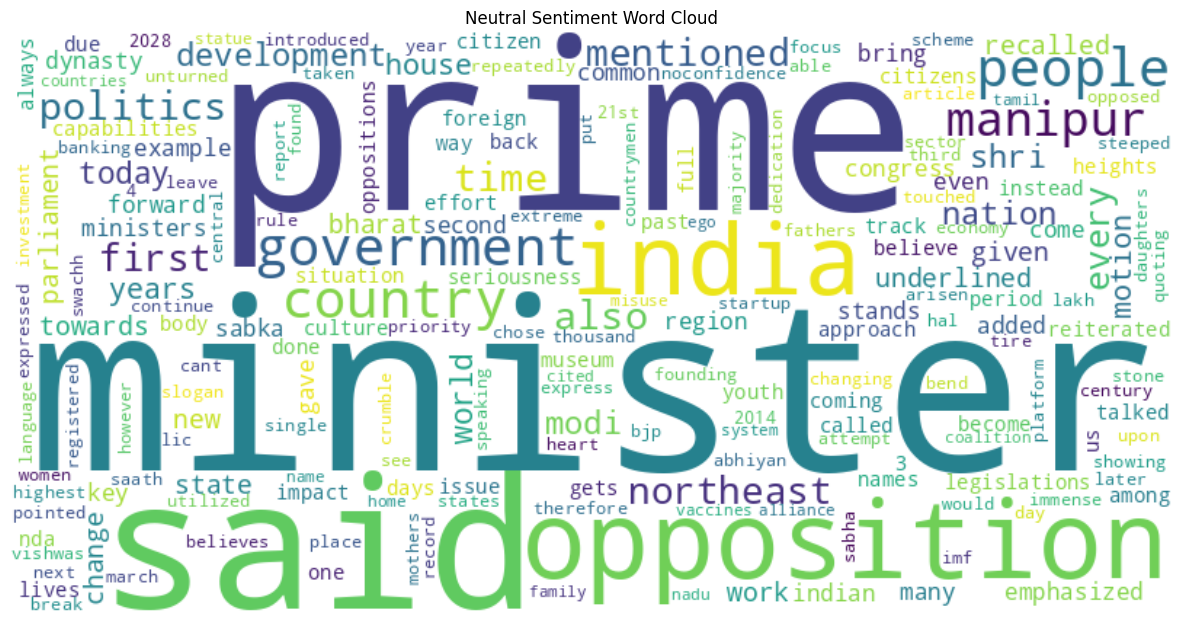

In [61]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")
plt.show()

In [62]:
word_freq = nltk.FreqDist(words_lemmatized)
wordcloud = WordCloud(width = 800 , height = 400 , background_color="white").generate_from_frequencies(word_freq)

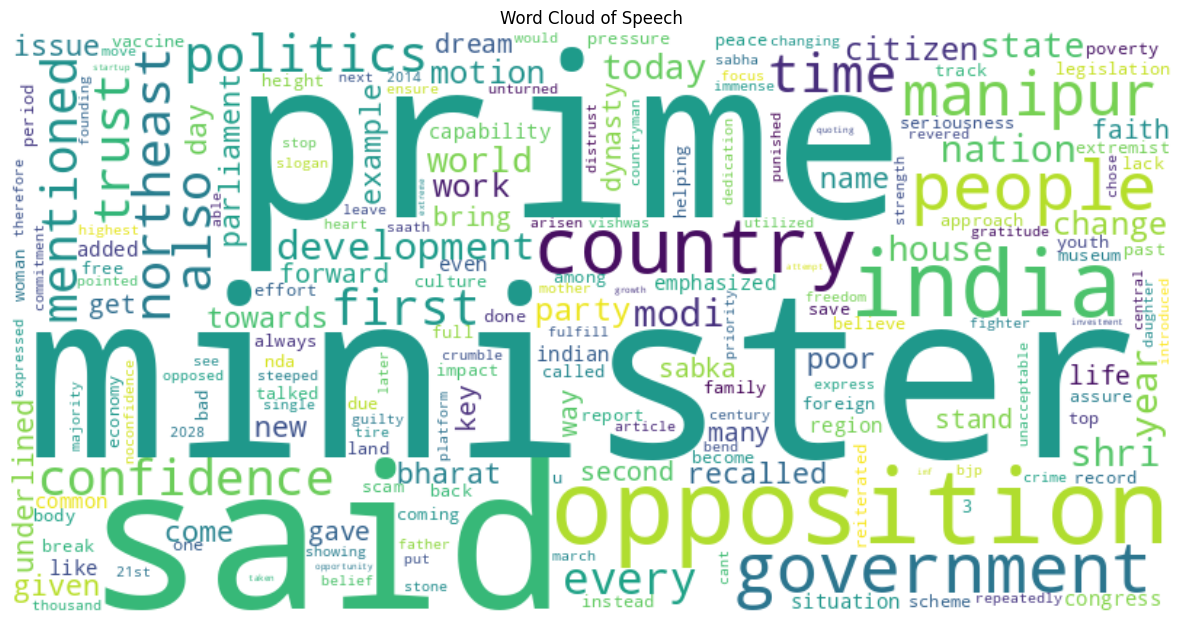

In [64]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Speech")
plt.show()

Summazrizing Percentages

In [65]:
total_words = len(words_filtered)
positive_percentage = (len(positive_words) / total_words) * 100
negative_percentage = (len(negative_words) / total_words) * 100
neutral_percentage = (len(neutral_words) / total_words) * 100

print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)

Positive Sentiment Percentage: 8.614232209737828
Negative Sentiment Percentage: 5.118601747815231
Neutral Sentiment Percentage: 86.26716604244695


Creating new Data

In [66]:
data = {"Sentiment" : ['Positive' , 'Negative' , 'Neutral'] ,
        "Percentage" : [positive_percentage , negative_percentage , neutral_percentage]
        }

Creating new Data Frame

In [68]:
df_percentages = pd.DataFrame(data)

In [70]:
df_percentages

,Sentiment,Percentage
0,Positive,8.614232
1,Negative,5.118602
2,Neutral,86.267166


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_percentages, *['Percentage'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_percentages, *['Percentage'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_percentages, *['Sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_percentages, *['Percentage', 'Sentiment'], **{'inner': 'stick'})
chart

Plotting Overall Graph

In [71]:
fig = px.bar(df_percentages, x='Sentiment', y='Percentage', color='Sentiment',
             labels={'Sentiment': 'Sentiment Category', 'Percentage': 'Percentage (%)'},
             title='Percentage of Words in Each Sentiment Category')
fig.show()

What is Gensim?:

 Gensim is an open-source Python library designed for natural language processing (NLP) and machine learning. It is specifically focused on unsupervised topic modeling, document similarity analysis, and other tasks related to text and document analysis

 The gensim.corpora module within Gensim is responsible for managing text corpora. A corpus is a collection of text documents, and Gensim provides tools to represent and work with corpora in a way that is suitable for various NLP tasks, particularly topic modeling.

  Latent Dirichlet Allocation (LDA) models:

  LdaModel class allows you to create, train, and use LDA models on text corpora. LDA models are used to discover hidden topics in a collection of documents and assign topic probabilities to individual documents and words.

In [72]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

he corpora.Dictionary function creates a dictionary that assigns a unique ID

to each unique word in the provided list(s) of words.

In [73]:
dictionary = corpora.Dictionary([words_filtered])


The doc2bow() method of the dictionary object is used to convert a document (represented as a list of words) into a bag of words. "BOW" stands for "bag of words," which is a common method for representing text data in a format suitable for various natural language processing tasks.

In [74]:
corpus = [dictionary.doc2bow(words_filtered)]

Gensim's Latent Dirichlet Allocation (LDA) model to perform topic modeling on a corpus of documents.

In [76]:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.029*"minister" + 0.028*"prime" + 0.026*"said" + 0.018*"opposition" + 0.015*"india"')
(1, '0.001*"prime" + 0.001*"minister" + 0.001*"country" + 0.001*"said" + 0.001*"india"')
(2, '0.001*"said" + 0.001*"minister" + 0.001*"prime" + 0.001*"opposition" + 0.001*"government"')
(3, '0.001*"prime" + 0.001*"minister" + 0.001*"said" + 0.001*"opposition" + 0.001*"india"')
(4, '0.001*"minister" + 0.001*"prime" + 0.001*"said" + 0.001*"opposition" + 0.001*"india"')


For example, if your speech_text contains sentences like "Apple Inc. is headquartered in Cupertino, California," this code will identify "Apple Inc." as an entity with the label "ORG" (organization) and "Cupertino, California" as an entity with the label "GPE" (geopolitical entity). The output will display these entities and their labels.

In [77]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(speech_text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

for entity, label in entities:
    print(f"Entity: {entity}, Label: {label}")

Entity: India, Label: GPE
Entity: the 21st century, Label: DATE
Entity: the next thousand years, Label: DATE
Entity: India, Label: GPE
Entity: Today, Label: DATE
Entity: 2028, Label: DATE
Entity: Country, Label: ORG
Entity: 3, Label: CARDINAL
Entity: the Central Government, Label: ORG
Entity: the State Government, Label: ORG
Entity: Manipur, Label: GPE
Entity: Manipur, Label: GPE
Entity: Manipur, Label: GPE
Entity: House, Label: ORG
Entity: Manipur, Label: GPE
Entity: first, Label: ORDINAL
Entity: Northeast, Label: LOC
Entity: Sabka Saath Sabka Vishwas, Label: PERSON
Entity: Parliament, Label: ORG
Entity: Party, Label: ORG
Entity: Parliament, Label: ORG
Entity: The India of today, Label: WORK_OF_ART
Entity: India, Label: GPE
Entity: Shri Narendra Modi, Label: PERSON
Entity: the Motion of No Confidence, Label: ORG
Entity: Lok Sabha, Label: PERSON
Entity: today, Label: DATE
Entity: House, Label: ORG
Entity: India, Label: GPE
Entity: 2018, Label: DATE
Entity: 2019, Label: DATE
Entity: NDA

KeyBERT is a library for keyword extraction and allows you to find important words or phrases in a text.

In [79]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23765 sha256=a5689850dcf059fb5433971c1b3338ea5b07e9c4f4fdb38a4b5e91a79025ee93
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=787a67aba23cbc36e86ec543f8b801c585d4518e79dcd060c50a132a33a5ef18
 

he output of this code will be a list of keywords extracted from the speech_text. These keywords are typically words or phrases that the KeyBERT algorithm considers important or representative of the content in the text. The specific keywords extracted will depend on the content of the speech_text and the behavior of the KeyBERT model.

In [80]:
from keybert import KeyBERT
kw_extractor = KeyBERT()
keywords = kw_extractor.extract_keywords(speech_text)
for keyword in keywords:
    print(keyword[0])

manipur
nehru
bjp
rajya
gandhi


NRCLex is used for sentiment and emotion analysis based on the NRC (National Research Council) Emotion Lexicon.

In [81]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43310 sha256=9fa84cd083e892569cf8b3faf51181c8800e991a2c79b2fc3c13cdf11a09917e
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


emotions = text_emotion.affect_frequencies: This line extracts the affect (emotion) frequencies from the text_emotion object. The affect_frequencies attribute contains a dictionary where emotion names are keys, and their corresponding frequencies in the text are values.}

In [83]:
from nrclex import NRCLex

text_emotion = NRCLex(speech_text_cleaned)

emotions = text_emotion.affect_frequencies

for emotion, frequency in emotions.items():
    print(f"Emotion: {emotion}, Frequency: {frequency}")

Emotion: fear, Frequency: 0.10664993726474278
Emotion: anger, Frequency: 0.1053952321204517
Emotion: anticip, Frequency: 0.0
Emotion: trust, Frequency: 0.1329987452948557
Emotion: surprise, Frequency: 0.02258469259723965
Emotion: positive, Frequency: 0.23462986198243413
Emotion: negative, Frequency: 0.1668757841907152
Emotion: sadness, Frequency: 0.04642409033877039
Emotion: disgust, Frequency: 0.033877038895859475
Emotion: joy, Frequency: 0.06524466750313676
Emotion: anticipation, Frequency: 0.08531994981179424


In [84]:
data = {'Emotion': [], 'Frequency': []}
for emotion, frequency in emotions.items():
    data['Emotion'].append(emotion)
    data['Frequency'].append(frequency)

df_emotions = pd.DataFrame(data)

fig = px.bar(df_emotions, x='Emotion', y='Frequency', color='Emotion',
             labels={'Emotion': 'Emotion', 'Frequency': 'Frequency'},
             title='Emotion Frequencies in the Speech')
fig.show()

textstat library to calculate various readability scores for the cleaned text stored in the speech_text_cleaned variable.

In [85]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.1 MB/s eta 0:00:00


The Flesch Reading Ease score is a measure of how easy or difficult it is to read a text. Higher scores indicate easier readability, while lower scores suggest more complex text.

The Flesch-Kincaid Grade Level is an estimate of the U.S. school grade level required to understand the text. Higher values indicate more complex text.


The SMOG Index estimates the number of years of education required to understand the text. Higher values indicate more advanced reading level requirements.


In [88]:
import textstat

flesch_score = textstat.flesch_reading_ease(speech_text_cleaned)
flesch_grade = textstat.flesch_kincaid_grade(speech_text_cleaned)
smog_index = textstat.smog_index(speech_text_cleaned)

print(f"Flesch Reading Ease Score: {flesch_score}")
print(f"Flesch-Kincaid Grade Level: {flesch_grade}")
print(f"SMOG Index: {smog_index}")

Flesch Reading Ease Score: -3018.87
Flesch-Kincaid Grade Level: 1192.8
SMOG Index: 0.0


 NLTK (Natural Language Toolkit) to calculate and print the Pointwise Mutual Information (PMI) scores for bigrams in the cleaned text (speech_text_cleaned).

In [87]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

tokens = nltk.word_tokenize(speech_text_cleaned)

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

pmi_scores = finder.score_ngrams(bigram_measures.pmi)

for bigram, pmi in pmi_scores[:10]:
    print(f"Bigram: {bigram}, PMI: {pmi}")

Bigram: ('135', 'crore'), PMI: 11.576484346796851
Bigram: ('400', 'night'), PMI: 11.576484346796851
Bigram: ('5', 'economies'), PMI: 11.576484346796851
Bigram: ('50000', 'per'), PMI: 11.576484346796851
Bigram: ('account', 'yoga'), PMI: 11.576484346796851
Bigram: ('air', 'travel'), PMI: 11.576484346796851
Bigram: ('almost', 'eradicated'), PMI: 11.576484346796851
Bigram: ('arunachal', 'pradesh'), PMI: 11.576484346796851
Bigram: ('aspirations', 'whatever'), PMI: 11.576484346796851
Bigram: ('azad', 'hind'), PMI: 11.576484346796851
